# Construction de Psi

## Imports

### Librairies

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import os

### Autres fichiers

In [11]:
from affichageDonnees import displaySpectrogram, displaySound, scatter_over_pertinence, scatter_over_similarity
from utils import getSound, getAllDates, getSoundAtPosition, getDateFromFilename, getFilenameAtPosition, getPositionOfFilename, getAllFilenames
from constructionPsi import *

## Construction

### Pertinence

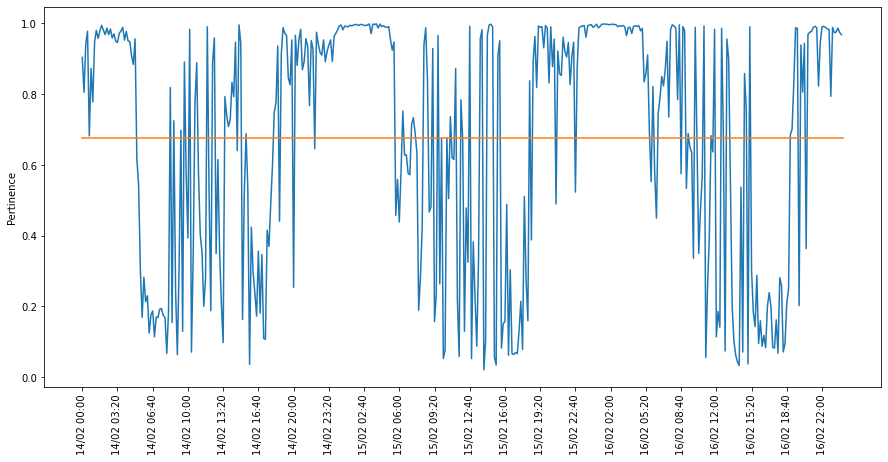

In [12]:
# Afichage des pertinences
nbSounds = 432
root = './SoundDatabase'

q = compute_all_pertinence(root)

# Tri par dates
q.sort(order = 'file')

step = 20
dates = getAllDates(root, with_year = False)[::step]

scatter_over_pertinence(q, dates)

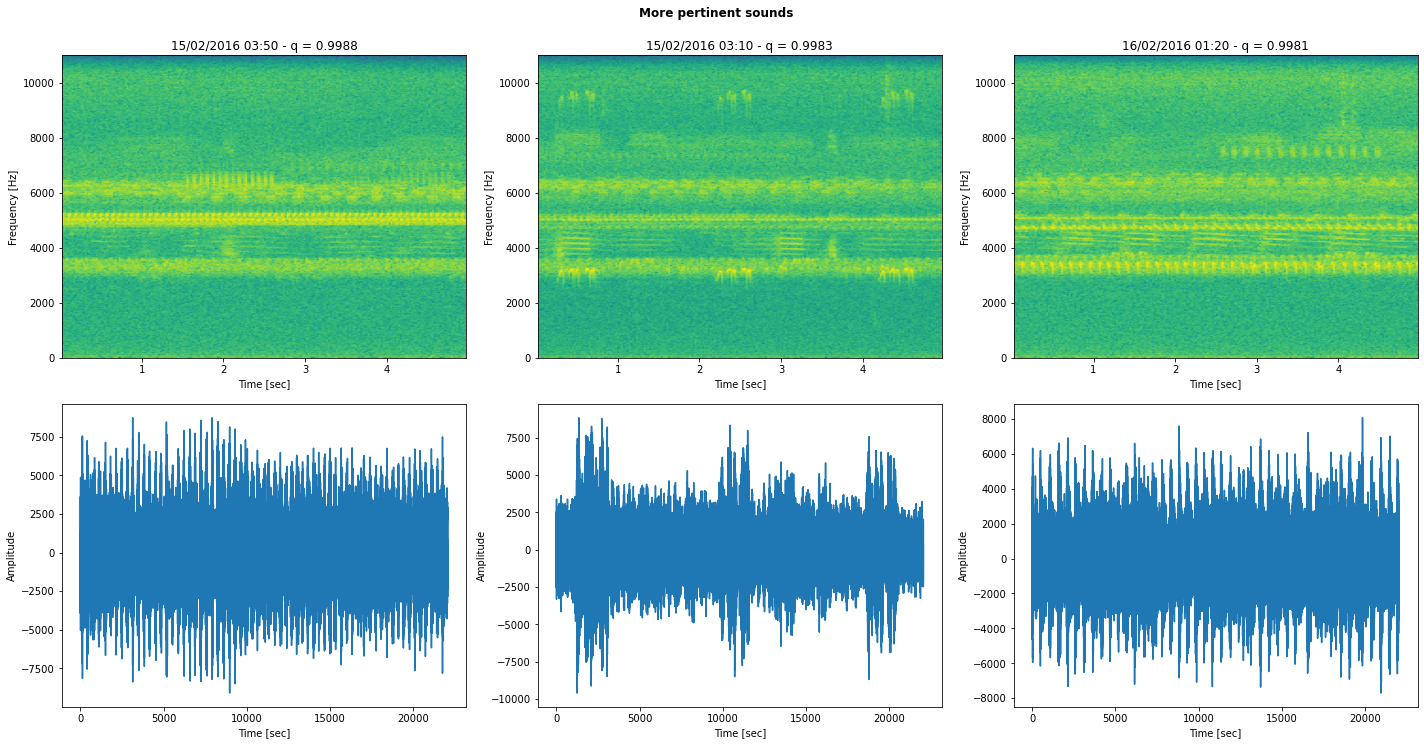

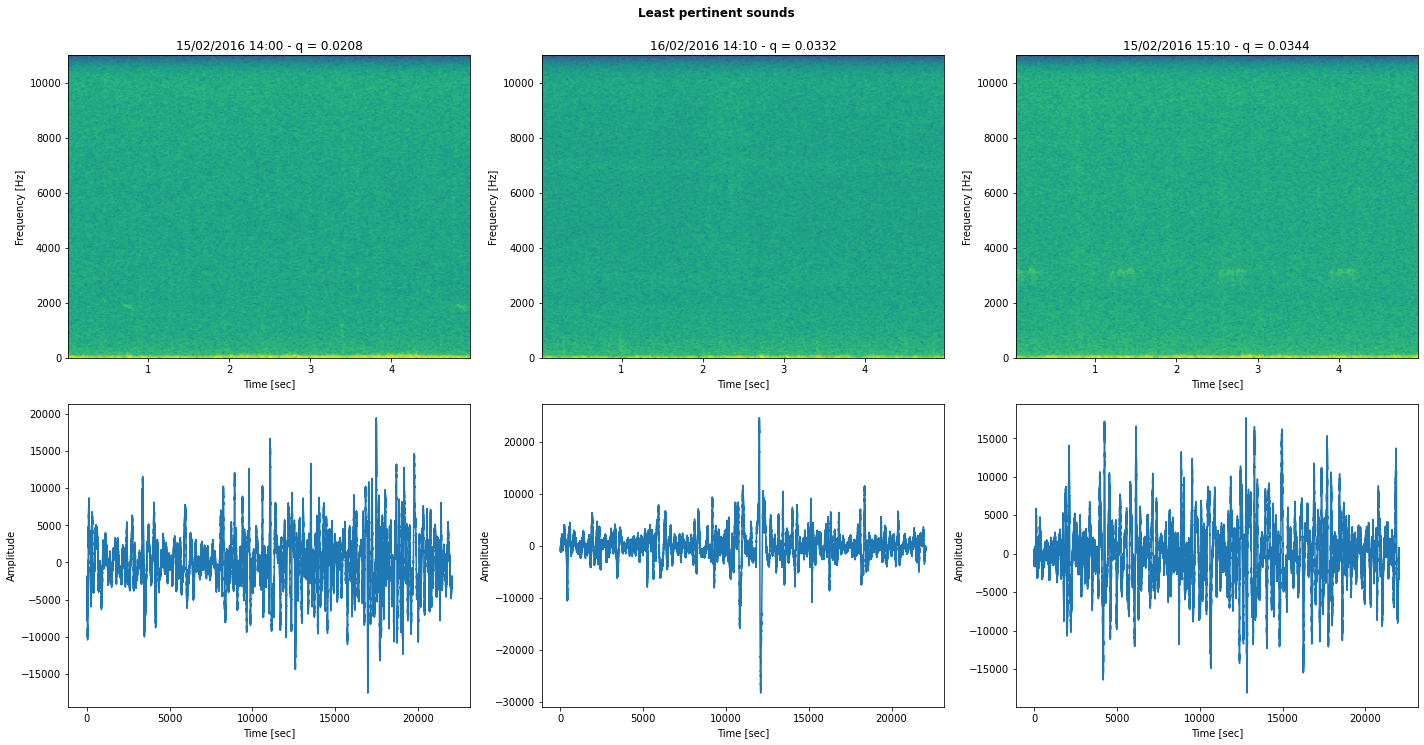

In [13]:
# Tri par pertinence

q.sort(order = 'pertinence')

nbSounds = 432
pertinence_files = q['file']
pertinence_scores = q['pertinence']

nbTop = 3

fig, ax = plt.subplots(2, nbTop, figsize=(20, 10))
for k in range(nbTop):

    sound, fe = getSound(os.path.join(root, pertinence_files[nbSounds - k - 1]), 5)
    title = "{0} - q = {1:.4f}".format(getDateFromFilename(pertinence_files[nbSounds - k - 1]), pertinence_scores[nbSounds - k - 1])
    
    displaySpectrogram(sound, fe, title, ax[0, k])

    displaySound(sound, fe, 5, "", ax[1, k])

plt.suptitle("More pertinent sounds", y = 1.03, fontweight = 'bold')
plt.show()


fig, ax = plt.subplots(2, nbTop, figsize=(20, 10))
for k in range(nbTop):
    sound, fe = getSound(os.path.join(root, pertinence_files[k]), 5)
    title = "{0} - q = {1:.4f}".format(getDateFromFilename(pertinence_files[k]), pertinence_scores[k])
    
    displaySpectrogram(sound, fe, title, ax[0, k])

    displaySound(sound, fe, 5, "", ax[1, k])

plt.suptitle("Least pertinent sounds", y = 1.03, fontweight = 'bold')
plt.show()

In [14]:
# Calcul de la similarité moyenne entre les signaux de pertinences maximales

root = './SoundDatabase'
nbSounds = 432
nbTop = 3
psi = getpsi(verbose = False)

mean = 0
for i in range(nbTop):
    position1 = getPositionOfFilename(root, pertinence_files[nbSounds - i - 1])
    for j in range(i):
        position2 = getPositionOfFilename(root, pertinence_files[nbSounds - j - 1])
        mean += similarity(position1, position2, psi)
mean /= nbTop * (nbTop - 1) / 2

print(mean)

0.9104082462829127


### Descripteur

(69,)


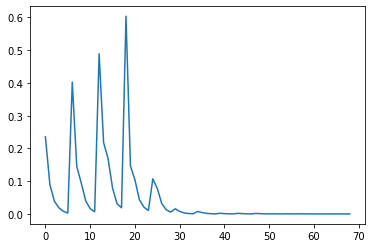

In [15]:
s, fe = getSound("./SoundDatabase/BRA2S3786_20160214_000000.wav", 1)
J, Q = 8, 3

d = compute_descriptor(s, J, Q)

print(d.shape)
plt.plot(d)
plt.show()

### PSI

loading psi from persisted file
(432, 69)


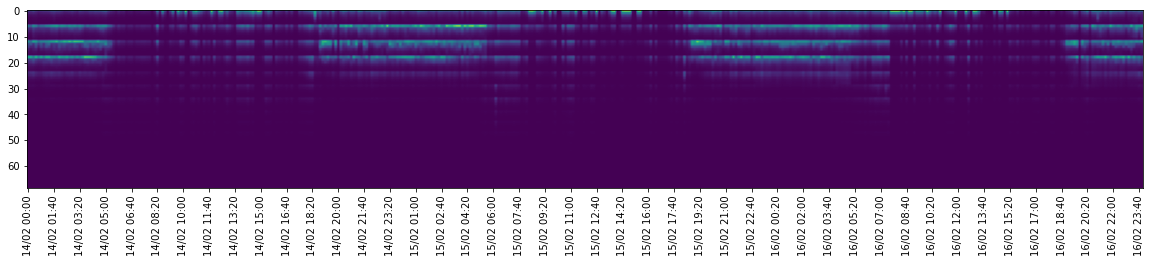

In [16]:
psi = getpsi()
print(psi.shape)
fig = plt.figure(figsize=(20, 10))
plt.imshow(psi.T)

step = 10
dates = getAllDates(root, with_year = False)[::step]
plt.xticks(np.arange(0, nbSounds, step = step), dates, rotation = 90)

plt.show()

## Mesure de similarité

Similarité moyennne :  0.842900718460169
Similarité minimale :  0.23455130133533825


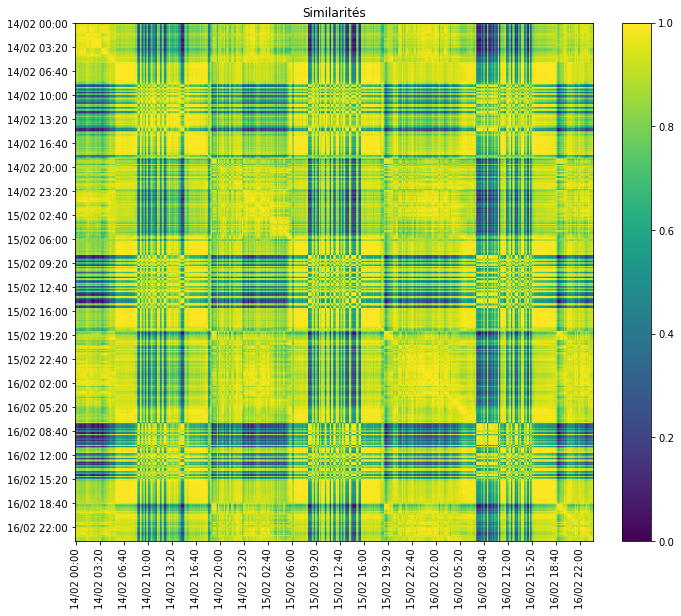

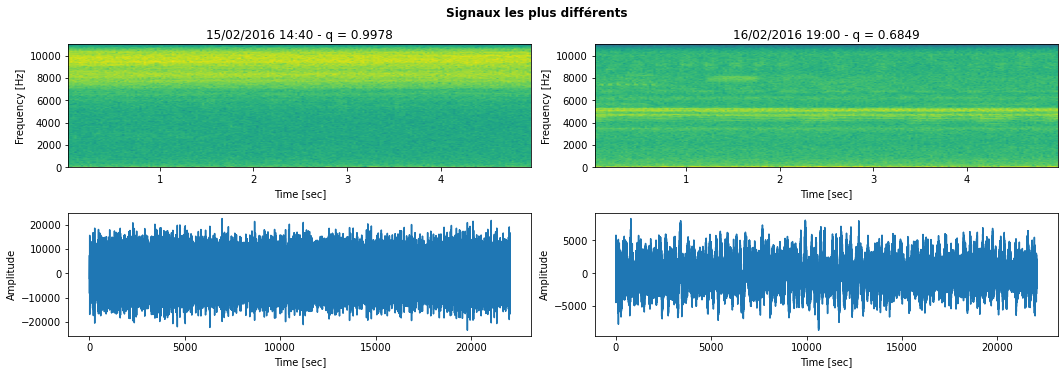

In [17]:
# Calcul de l'ensemble des similarités
psi = getpsi(verbose = False)

similarities = similarity_all(psi)

# Affichage de l'ensemble des similarités
nbSounds = 432
root = './SoundDatabase'
step = 20
dates = getAllDates(root, with_year = False)[::step]



scatter_over_similarity(similarities, dates)


# Similarité moyenne
print("Similarité moyennne : ", compute_average_similaritiy(getAllFilenames(root), root))


# Similarité minimale
ind = np.unravel_index(np.argmin(similarities, axis=None), similarities.shape)
print("Similarité minimale : ", similarities[ind])

# Spectrogramme des 2 signaux les plus différents
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

sound, fe = getSoundAtPosition(root, ind[0], 5)
title = "{0} - q = {1:.4f}".format(getDateFromFilename(getFilenameAtPosition(root, ind[0]), with_root=True, root=root), compute_pertinence(sound, fe))
displaySpectrogram(sound, fe, title, ax[0, 0])

displaySound(sound, fe, 5, "", ax[1, 0])

sound, fe = getSoundAtPosition(root, ind[1], 5)
title = "{0} - q = {1:.4f}".format(getDateFromFilename(getFilenameAtPosition(root, ind[1]), with_root=True, root=root), compute_pertinence(sound, fe))
displaySpectrogram(sound, fe, title, ax[0, 1])

displaySound(sound, fe, 5, "", ax[1, 1])

plt.suptitle("Signaux les plus différents", y = 1.03, fontweight = 'bold')
plt.show()
